# Load data to SQL 

Objective: 

1. Allow public access
2. To pull target data for further analysis
3. Ease of doing query

Questions to Answer: 

1. Identify top sectors contributing to S&P500 performance.

Prepare data to:  
a. Find out the top sectors growth over time

b. Rate of return from top sectors over time

In [1]:
import pandas as pd
stock_info = pd.read_csv('sp500_name_info.csv')
stock_price = pd.read_csv('sp500_stocksprice2019_23.csv')

In [2]:
#connecting to SQLite

import sqlite3
conn = sqlite3.connect(r"C:\Users\chinf\IOD\0_miniprojects\1_sharesnalyzer\mp1_sharesnalyzer\s&p500.db")
c = conn.cursor()

#Load data to table in SQL db
stock_info.to_sql('sp500_name_info', con = conn, if_exists = 'replace', index = False)

503

In [3]:
#Load data to table in SQL db
stock_price.to_sql('sp500_price', con = conn, if_exists = 'replace', index = False)

575937

In [4]:
#Check data properly loaded - for info
query = "SELECT * FROM sp500_name_info LIMIT 10"
df = pd.read_sql_query(query, conn)
print(df)

   Unnamed: 0 tickers                names             gics_sector
0           0     MMM                   3M             Industrials
1           1     AOS          A. O. Smith             Industrials
2           2     ABT               Abbott             Health Care
3           3    ABBV               AbbVie             Health Care
4           4     ACN            Accenture  Information Technology
5           5    ATVI  Activision Blizzard  Communication Services
6           6     ADM                  ADM        Consumer Staples
7           7    ADBE           Adobe Inc.  Information Technology
8           8     ADP                  ADP             Industrials
9           9     AAP   Advance Auto Parts  Consumer Discretionary


In [5]:
c.execute('ALTER TABLE sp500_name_info RENAME COLUMN tickers TO ticker')
conn.commit()

In [6]:
#Check data properly loaded - for price
query = "SELECT * FROM sp500_price LIMIT 10"
df = pd.read_sql_query(query, conn)
print(df)

         Date Symbol  Adj Close      Close       High        Low       Open  \
0  2019-01-02      A  63.616905  65.690002  66.570000  65.300003  66.500000   
1  2019-01-03      A  61.273285  63.270000  65.779999  62.000000  65.529999   
2  2019-01-04      A  63.394173  65.459999  65.949997  64.089996  64.089996   
3  2019-01-07      A  64.740311  66.849998  67.430000  65.610001  65.639999   
4  2019-01-08      A  65.689369  67.830002  68.209999  66.699997  67.589996   
5  2019-01-09      A  67.064545  69.250000  69.660004  68.000000  68.199997   
6  2019-01-10      A  67.694046  69.900002  69.949997  68.599998  69.050003   
7  2019-01-11      A  68.158905  70.379997  70.410004  68.940002  69.290001   
8  2019-01-14      A  67.548790  69.750000  70.290001  69.669998  69.720001   
9  2019-01-15      A  68.371941  70.599998  70.750000  69.620003  69.949997   

      Volume  
0  2113300.0  
1  5383900.0  
2  3123700.0  
3  3235100.0  
4  1578100.0  
5  2442300.0  
6  1080900.0  
7  1210800

In [7]:
#rename Symbol column to tickers
c.execute('ALTER TABLE sp500_price RENAME COLUMN Symbol TO ticker')
c.execute('ALTER TABLE sp500_price RENAME COLUMN "Adj Close" TO adj_close')
c.execute('ALTER TABLE sp500_price RENAME COLUMN Date TO date')
conn.commit()

query = "SELECT * FROM sp500_price LIMIT 10"
df = pd.read_sql_query(query, conn)
print(df)

         date ticker  adj_close      Close       High        Low       Open  \
0  2019-01-02      A  63.616905  65.690002  66.570000  65.300003  66.500000   
1  2019-01-03      A  61.273285  63.270000  65.779999  62.000000  65.529999   
2  2019-01-04      A  63.394173  65.459999  65.949997  64.089996  64.089996   
3  2019-01-07      A  64.740311  66.849998  67.430000  65.610001  65.639999   
4  2019-01-08      A  65.689369  67.830002  68.209999  66.699997  67.589996   
5  2019-01-09      A  67.064545  69.250000  69.660004  68.000000  68.199997   
6  2019-01-10      A  67.694046  69.900002  69.949997  68.599998  69.050003   
7  2019-01-11      A  68.158905  70.379997  70.410004  68.940002  69.290001   
8  2019-01-14      A  67.548790  69.750000  70.290001  69.669998  69.720001   
9  2019-01-15      A  68.371941  70.599998  70.750000  69.620003  69.949997   

      Volume  
0  2113300.0  
1  5383900.0  
2  3123700.0  
3  3235100.0  
4  1578100.0  
5  2442300.0  
6  1080900.0  
7  1210800

In [8]:
#drop multiple columns
c.execute('ALTER TABLE sp500_price \
           DROP COLUMN close')
c.execute('ALTER TABLE sp500_price \
           DROP COLUMN high')
c.execute('ALTER TABLE sp500_price \
           DROP COLUMN low')
c.execute('ALTER TABLE sp500_price \
           DROP COLUMN open')
c.execute('ALTER TABLE sp500_price \
           DROP COLUMN volume')
conn.commit()

In [9]:
#convert SQL result to a DataFrame on distinct sectors counts in s&p500
                 
c.execute("SELECT gics_sector, COUNT(*) AS `count` FROM sp500_name_info GROUP BY gics_sector ORDER BY count DESC")

pdf_sectorcount= pd.DataFrame(c.fetchall(), columns = ['gics_sector', 'count'])
print (pdf_sectorcount)

               gics_sector  count
0              Industrials     74
1               Financials     72
2   Information Technology     67
3              Health Care     65
4   Consumer Discretionary     53
5         Consumer Staples     37
6                Utilities     30
7              Real Estate     30
8                Materials     29
9                   Energy     23
10  Communication Services     23


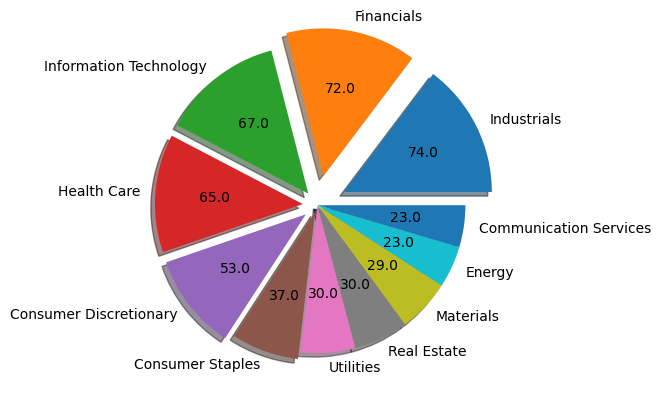

In [112]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([74,72,67,65,53,37,30,30,29,23,23])
mylabels = ["Industrials", "Financials", "Information Technology", "Health Care",\
            "Consumer Discretionary", "Consumer Staples","Utilities","Real Estate", \
            "Materials", "Energy", "Communication Services"]
myexplode = [0.2, 0.2, 0.1, 0.1, 0.1, 0.05, 0, 0, 0, 0, 0]

def absolute_value(val):
    a  = numpy.round(val/100.*y.sum(), 0)
    return a

plt.pie(y, labels = mylabels, explode = myexplode, autopct=absolute_value, shadow = True)
plt.show()

In [10]:
#save Panda Dataframe to csv
pdf_sectorcount.to_csv('sp500_sectorcount.csv')

In [15]:
#join stock price table with stock info (sector) - industrial

c.execute("SELECT sp500_price.date, sp500_price.adj_close, sp500_price.ticker \
            FROM sp500_price JOIN sp500_name_info ON (sp500_price.ticker=sp500_name_info.ticker) \
            WHERE gics_sector = 'Industrials'")

pdf_industrialprice= pd.DataFrame(c.fetchall(), columns = ['date', 'adj_close', 'ticker'])
pdf_industrialprice.set_index('date', inplace=True) #set Date as the index.
pdf_industrialprice.to_csv('sp500_industrialprice.csv')
print (pdf_industrialprice)

             adj_close ticker
date                         
2019-01-02  160.983093    MMM
2019-01-03  154.921478    MMM
2019-01-04  161.295029    MMM
2019-01-07  160.924088    MMM
2019-01-08  161.598526    MMM
...                ...    ...
2023-07-31  112.750000    XYL
2023-08-01  111.930000    XYL
2023-08-02  112.080002    XYL
2023-08-03  108.400002    XYL
2023-08-04  105.669998    XYL

[84934 rows x 2 columns]


In [16]:
pdf_industrialprice.describe()

,adj_close
count,84934.000000
mean,141.340370
std,109.188019
min,9.040000
25%,62.196955
50%,112.890572
75%,189.096531
max,902.630005


In [17]:
pdf_industrialprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84934 entries, 2019-01-02 to 2023-08-04
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  84934 non-null  float64
 1   ticker     84934 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [18]:
#join stock price table with stock info (sector) - financials

c.execute("SELECT sp500_price.date, sp500_price.adj_close, sp500_price.ticker \
            FROM sp500_price JOIN sp500_name_info ON (sp500_price.ticker=sp500_name_info.ticker) \
            WHERE gics_sector = 'Financials'")

pdf_financialprice = pd.DataFrame(c.fetchall(), columns = ['date', 'adj_close', 'ticker'])
pdf_financialprice.set_index('date', inplace=True) #set Date as the index.

pdf_financialprice.to_csv('sp500_financialprice.csv')

In [19]:
#join stock price table with stock info (sector) - infotech

c.execute("SELECT sp500_price.date, sp500_price.adj_close, sp500_price.ticker \
            FROM sp500_price JOIN sp500_name_info ON (sp500_price.ticker=sp500_name_info.ticker) \
            WHERE gics_sector = 'Information Technology'")

pdf_ITprice= pd.DataFrame(c.fetchall(), columns = ['date', 'adj_close', 'ticker'])
pdf_ITprice.set_index('date', inplace=True) #set Date as the index.

pdf_ITprice.to_csv('sp500_ITprice.csv')

In [20]:
#join stock price table with stock info (sector) - healthcare

c.execute("SELECT sp500_price.date, sp500_price.adj_close, sp500_price.ticker \
            FROM sp500_price JOIN sp500_name_info ON (sp500_price.ticker=sp500_name_info.ticker) \
            WHERE gics_sector = 'Health Care'")

pdf_healthcprice= pd.DataFrame(c.fetchall(), columns = ['date', 'adj_close', 'ticker'])
pdf_healthcprice.set_index('date', inplace=True) #set Date as the index.

pdf_healthcprice.to_csv('sp500_healthcprice.csv')

In [21]:
#join stock price table with stock info (sector) - consumerd

c.execute("SELECT sp500_price.date, sp500_price.adj_close, sp500_price.ticker \
            FROM sp500_price JOIN sp500_name_info ON (sp500_price.ticker=sp500_name_info.ticker) \
            WHERE gics_sector = 'Consumer Discretionary'")

pdf_consumerdprice= pd.DataFrame(c.fetchall(), columns = ['date', 'adj_close', 'ticker'])
pdf_consumerdprice.set_index('date', inplace=True) #set Date as the index.

pdf_consumerdprice.to_csv('sp500_consumerdprice.csv')

In [22]:
#load dataset to sql as table for all sectors
pd.read_csv('sp500_industrialprice.csv').to_sql('sp500_industrial', con = conn, if_exists = 'replace', index = False)

84934

In [23]:
pd.read_csv('sp500_ITprice.csv').to_sql('sp500_infotech', con = conn, if_exists = 'replace', index = False)

77451

In [24]:
pd.read_csv('sp500_healthcprice.csv').to_sql('sp500_healthc', con = conn, if_exists = 'replace', index = False)

73547

In [25]:
pd.read_csv('sp500_financialprice.csv').to_sql('sp500_financials', con = conn, if_exists = 'replace', index = False)

82076

In [26]:
pd.read_csv('sp500_consumerdprice.csv').to_sql('sp500_consumerd', con = conn, if_exists = 'replace', index = False)

61268

Notes: Greater flexibility (to update/replace content) by saving query to csv file and load it to db as table. 

In [ ]:
'''Alternative method:

c.execute("CREATE TABLE sp500_industrial \
            AS \
            SELECT \
            sp500_price.date, sp500_price.adj_close, sp500_price.ticker \
            FROM sp500_price JOIN sp500_name_info ON (sp500_price.ticker=sp500_name_info.ticker) \
            WHERE gics_sector = 'Industrials'")

conn.commit()'''

In [27]:
#rename each sector daily adjust close price (mean) as respective sector

c.execute('ALTER TABLE sp500_industrial RENAME COLUMN adj_close TO industrial')
c.execute('ALTER TABLE sp500_financials RENAME COLUMN adj_close TO financials')
c.execute('ALTER TABLE sp500_infotech RENAME COLUMN adj_close TO info_tech')
c.execute('ALTER TABLE sp500_healthc RENAME COLUMN adj_close TO healthc')
c.execute('ALTER TABLE sp500_consumerd RENAME COLUMN adj_close TO consumerd')

In [28]:
#Check data properly updated
query = "SELECT * FROM sp500_consumerd LIMIT 3"
df = pd.read_sql_query(query, conn)
print(df)

         date   consumerd ticker
0  2019-01-02  146.353149    AAP
1  2019-01-03  150.922089    AAP
2  2019-01-04  147.177948    AAP


In [29]:
#make a copy of all tables as the next step will drop tickers columns. Future analysis can be done using previous tables with tickers info. 

c.execute('CREATE TABLE newsp500_industrial AS SELECT * FROM sp500_industrial')
c.execute('CREATE TABLE newsp500_financials AS SELECT * FROM sp500_financials')
c.execute('CREATE TABLE newsp500_infotech AS SELECT * FROM sp500_infotech')
c.execute('CREATE TABLE newsp500_healthc AS SELECT * FROM sp500_healthc')
c.execute('CREATE TABLE newsp500_consumerd AS SELECT * FROM sp500_consumerd')

In [30]:
c.execute('ALTER TABLE newsp500_industrial DROP COLUMN ticker')
c.execute('ALTER TABLE newsp500_financials DROP COLUMN ticker')
c.execute('ALTER TABLE newsp500_infotech DROP COLUMN ticker')
c.execute('ALTER TABLE newsp500_healthc DROP COLUMN ticker')
c.execute('ALTER TABLE newsp500_consumerd DROP COLUMN ticker')
conn.commit()

In [50]:
#tabulate daily mean for 5 years for each sectors

query = "SELECT date, AVG(industrial) AS mean_industrial FROM newsp500_industrial GROUP BY date"
pdfmean_industrial = pd.read_sql_query(query, conn)
print(mean_industrial)

            date  mean_industrial
0     2019-01-02        91.181620
1     2019-01-03        88.510124
2     2019-01-04        92.013966
3     2019-01-07        92.524445
4     2019-01-08        93.727887
...          ...              ...
1151  2023-07-31       189.586031
1152  2023-08-01       189.677052
1153  2023-08-02       187.623149
1154  2023-08-03       186.817162
1155  2023-08-04       185.693243

[1156 rows x 2 columns]


In [82]:
c.execute("SELECT date, AVG(industrial) AS mean_industrial FROM newsp500_industrial GROUP BY date")

df = pd.DataFrame(c.fetchall(), columns = ['date1', 'm_industrial'])
df.set_index('date1', inplace=True) #set Date as the index.

df.to_csv('msp500_industrial.csv')
pd.read_csv('msp500_industrial.csv').to_sql('msp500_industrial', con = conn, if_exists = 'replace', index = False)

1156

In [83]:
c.execute("SELECT date, AVG(financials) AS mean_financials FROM newsp500_financials GROUP BY date")

df = pd.DataFrame(c.fetchall(), columns = ['date2', 'm_financials'])
df.set_index('date2', inplace=True) #set Date as the index.

df.to_csv('msp500_financials.csv')
pd.read_csv('msp500_financials.csv').to_sql('msp500_financials', con = conn, if_exists = 'replace', index = False)

1156

In [86]:
c.execute("SELECT date, AVG(info_tech) AS mean_infotech FROM newsp500_infotech GROUP BY date")

df = pd.DataFrame(c.fetchall(), columns = ['date3', 'm_infotech'])
df.set_index('date3', inplace=True) #set Date as the index.

df.to_csv('msp500_infotech.csv')
pd.read_csv('msp500_infotech.csv').to_sql('msp500_infotech', con = conn, if_exists = 'replace', index = False)

1156

In [87]:
c.execute("SELECT date, AVG(healthc) AS mean_healthc FROM newsp500_healthc GROUP BY date")

df = pd.DataFrame(c.fetchall(), columns = ['date4', 'm_healthc'])
df.set_index('date4', inplace=True) #set Date as the index.

df.to_csv('msp500_healthc.csv')
pd.read_csv('msp500_healthc.csv').to_sql('msp500_healthc', con = conn, if_exists = 'replace', index = False)

1156

In [88]:
c.execute("SELECT date, AVG(consumerd) AS mean_consumerd FROM newsp500_consumerd GROUP BY date")

df = pd.DataFrame(c.fetchall(), columns = ['date5', 'm_consumerd'])
df.set_index('date5', inplace=True) #set Date as the index.

df.to_csv('msp500_consumerd.csv')
pd.read_csv('msp500_consumerd.csv').to_sql('msp500_consumerd', con = conn, if_exists = 'replace', index = False)

1156

In [98]:
#create new table with daily mean data from all 5 sectors

c.execute("CREATE TABLE sp500_sectormean \
           AS \
           SELECT date1, m_industrial, m_financials, m_infotech, m_healthc,m_consumerd \
         FROM msp500_financials \
         JOIN msp500_industrial ON msp500_industrial.date1 = msp500_financials.date2 \
         JOIN msp500_infotech ON msp500_industrial.date1 = msp500_infotech.date3 \
         JOIN msp500_healthc ON msp500_industrial.date1 = msp500_healthc.date4 \
         JOIN msp500_consumerd ON msp500_industrial.date1 = msp500_consumerd.date5")

conn.commit()

In [102]:
query = "SELECT * FROM sp500_sectormean"
df = pd.read_sql_query(query, conn)
df.set_index('date1', inplace=True) #set Date as the index.
df.to_csv('sp500_sectormean.csv')

print(df)

            m_industrial  m_financials  m_infotech   m_healthc  m_consumerd
date1                                                                      
2019-01-02     91.181620     79.832870   82.037837  124.108827   175.019870
2019-01-03     88.510124     78.096261   78.581298  120.718783   172.014207
2019-01-04     92.013966     80.733547   81.791674  124.607095   175.863052
2019-01-07     92.524445     80.933418   83.149961  125.695130   178.594608
2019-01-08     93.727887     81.296899   84.043969  127.373960   179.309774
...                  ...           ...         ...         ...          ...
2023-07-31    189.586031    144.571252  232.017041  230.643690   392.334002
2023-08-01    189.677052    144.650561  231.827787  229.817539   391.078123
2023-08-02    187.623149    143.710496  224.344278  230.216461   387.237253
2023-08-03    186.817162    143.372958  224.394850  229.111845   385.294527
2023-08-04    185.693243    142.740563  222.431495  228.024308   389.515662

[1156 rows 

Using above, we can start EDA. 
